# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [70]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

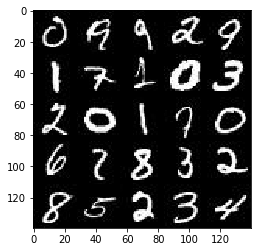

In [71]:
show_n_images = 25
import helper
data_dir = './data'
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

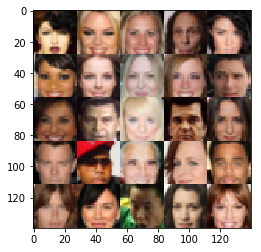

In [72]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [73]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


In [74]:
#For Tesorboard
def variable_summaries(var):
  """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""

  with tf.name_scope('summaries'):
    mean = tf.reduce_mean(var)
    tf.summary.scalar('mean', mean)
    with tf.name_scope('stddev'):
        stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
        tf.summary.scalar('stddev', stddev)
        tf.summary.scalar('max', tf.reduce_max(var))
        tf.summary.scalar('min', tf.reduce_min(var))
        tf.summary.histogram('histogram', var)

### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [87]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    with tf.name_scope("Input"):
        real_input = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name = 'Rear_Input')
    with tf.name_scope("Z_input"):
        z_input = tf.placeholder(tf.float32, (None, z_dim), name = 'Z_Input')
    with tf.name_scope("Learn_Rate"):    
        learnrate = tf.placeholder(tf.float32, name = 'Learning_Rate' )
    
    
    return real_input, z_input, learnrate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [88]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    alpha = 0.1
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        
            
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', activation=None)
        relu1 = tf.maximum(alpha * x1, x1)
    
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same', activation=None)
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
       
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same', activation=None)
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [95]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha = 0.1
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x512 now
         
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same', activation=None)
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x256 now
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same', activation=None)
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 28x28x128 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same', activation=None)
        # 28x28xoutdim now
        
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [96]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    
    # TODO: Implement Function
    smooth = 0.1

    g_model = generator(input_z,  out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                labels=tf.ones_like(d_model_real)* (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    tf.summary.scalar("Discriminator_Loss", d_loss)
    tf.summary.scalar("Generator_Loss", g_loss)
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [97]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [98]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [108]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    
   
   
   
   
  
    
    _, image_width, image_height, image_channels = data_shape    
    input_real, input_z, learn_rate= model_inputs(image_width, image_height, image_channels, z_dim)
        
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
        
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
      
   
    
    saver = tf.train.Saver()
    print_every = 16
    show_every = 100

    samples, losses = [], []
    steps = 0
    n_images = 25

    
    merged = tf.summary.merge_all()
    
    
    with tf.Session() as sess:
        train_writer = tf.summary.FileWriter('lab/3/train', sess.graph)
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                
                batch_images *= 2
               
                steps += 1

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                              
                
                # Run optimizers
                _ , summary = sess.run([d_opt, merged], 
                                       feed_dict={input_real: batch_images, 
                                                  input_z: batch_z, 
                                                  learn_rate: learning_rate})
                
                
                
                train_writer.add_summary(summary, steps)
                
                
                _ , summary = sess.run([g_opt, merged],
                                       feed_dict={input_z: batch_z, 
                                                  input_real: batch_images, 
                                                  learn_rate: learning_rate})
                train_writer.add_summary(summary, steps)
                
                
                
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                
                if steps % show_every == 0:
                    show_generator_output(sess, n_images, input_z, image_channels, data_image_mode)

            saver.save(sess, './generator_face.ckpt')

                        
    return losses
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.3755... Generator Loss: 4.2048
Epoch 1/2... Discriminator Loss: 0.3529... Generator Loss: 4.0748
Epoch 1/2... Discriminator Loss: 0.3543... Generator Loss: 4.2078
Epoch 1/2... Discriminator Loss: 0.3557... Generator Loss: 4.6044
Epoch 1/2... Discriminator Loss: 0.5776... Generator Loss: 2.7460
Epoch 1/2... Discriminator Loss: 0.4337... Generator Loss: 3.4137


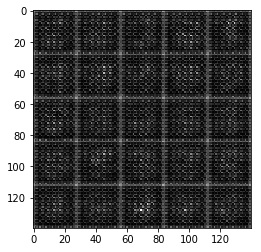

Epoch 1/2... Discriminator Loss: 0.8051... Generator Loss: 3.0392
Epoch 1/2... Discriminator Loss: 1.2110... Generator Loss: 0.8744
Epoch 1/2... Discriminator Loss: 1.3720... Generator Loss: 0.6653
Epoch 1/2... Discriminator Loss: 1.1956... Generator Loss: 0.9465
Epoch 1/2... Discriminator Loss: 1.0437... Generator Loss: 1.2658
Epoch 1/2... Discriminator Loss: 0.9985... Generator Loss: 1.2347


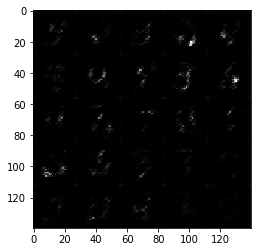

Epoch 1/2... Discriminator Loss: 1.0440... Generator Loss: 0.8780
Epoch 1/2... Discriminator Loss: 0.9888... Generator Loss: 1.2935
Epoch 1/2... Discriminator Loss: 1.2235... Generator Loss: 1.7747
Epoch 1/2... Discriminator Loss: 1.1449... Generator Loss: 0.7293
Epoch 1/2... Discriminator Loss: 1.0237... Generator Loss: 0.9293
Epoch 1/2... Discriminator Loss: 1.0405... Generator Loss: 1.9583


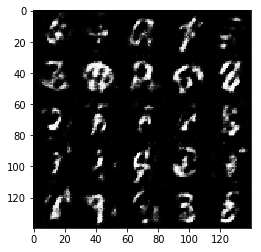

Epoch 1/2... Discriminator Loss: 0.9683... Generator Loss: 1.7099
Epoch 1/2... Discriminator Loss: 1.0091... Generator Loss: 0.9003
Epoch 1/2... Discriminator Loss: 0.9664... Generator Loss: 1.0972
Epoch 1/2... Discriminator Loss: 0.9819... Generator Loss: 1.5878
Epoch 1/2... Discriminator Loss: 1.0409... Generator Loss: 1.0995
Epoch 1/2... Discriminator Loss: 1.1348... Generator Loss: 0.7492
Epoch 1/2... Discriminator Loss: 1.1012... Generator Loss: 1.4520


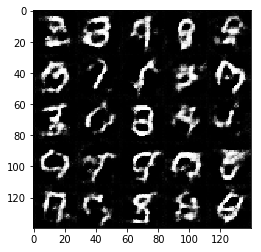

Epoch 1/2... Discriminator Loss: 1.1883... Generator Loss: 1.3084
Epoch 1/2... Discriminator Loss: 1.1111... Generator Loss: 0.8888
Epoch 1/2... Discriminator Loss: 1.1346... Generator Loss: 0.8797
Epoch 1/2... Discriminator Loss: 1.1746... Generator Loss: 1.5854
Epoch 2/2... Discriminator Loss: 1.1033... Generator Loss: 1.3937
Epoch 2/2... Discriminator Loss: 1.0544... Generator Loss: 1.2114


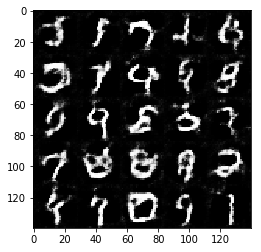

Epoch 2/2... Discriminator Loss: 1.1403... Generator Loss: 0.7812
Epoch 2/2... Discriminator Loss: 1.2375... Generator Loss: 0.6699
Epoch 2/2... Discriminator Loss: 1.0953... Generator Loss: 0.9746
Epoch 2/2... Discriminator Loss: 1.2047... Generator Loss: 0.7185
Epoch 2/2... Discriminator Loss: 1.0547... Generator Loss: 0.9841
Epoch 2/2... Discriminator Loss: 1.1577... Generator Loss: 1.1253


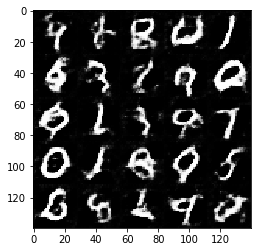

Epoch 2/2... Discriminator Loss: 1.0887... Generator Loss: 1.2434
Epoch 2/2... Discriminator Loss: 1.2472... Generator Loss: 1.6671
Epoch 2/2... Discriminator Loss: 1.2025... Generator Loss: 0.6757
Epoch 2/2... Discriminator Loss: 1.1530... Generator Loss: 0.9102
Epoch 2/2... Discriminator Loss: 1.0926... Generator Loss: 1.0704
Epoch 2/2... Discriminator Loss: 1.1786... Generator Loss: 1.3095


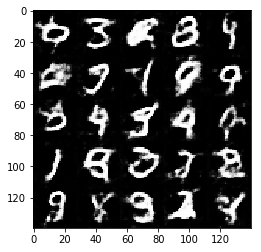

Epoch 2/2... Discriminator Loss: 1.2108... Generator Loss: 0.7284
Epoch 2/2... Discriminator Loss: 1.1830... Generator Loss: 1.7315
Epoch 2/2... Discriminator Loss: 1.1815... Generator Loss: 0.7339
Epoch 2/2... Discriminator Loss: 1.0484... Generator Loss: 1.0902
Epoch 2/2... Discriminator Loss: 1.1150... Generator Loss: 0.9795
Epoch 2/2... Discriminator Loss: 1.1901... Generator Loss: 0.6911
Epoch 2/2... Discriminator Loss: 1.0397... Generator Loss: 1.4240


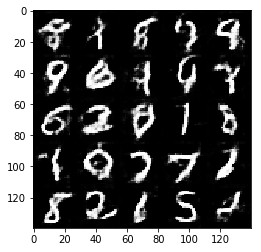

Epoch 2/2... Discriminator Loss: 1.0339... Generator Loss: 1.0487
Epoch 2/2... Discriminator Loss: 1.1438... Generator Loss: 1.5866
Epoch 2/2... Discriminator Loss: 1.1186... Generator Loss: 0.9421
Epoch 2/2... Discriminator Loss: 1.0680... Generator Loss: 1.5318
Epoch 2/2... Discriminator Loss: 1.1332... Generator Loss: 1.6472
Epoch 2/2... Discriminator Loss: 1.0113... Generator Loss: 1.1818


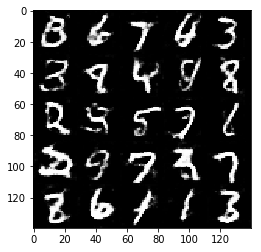

Epoch 2/2... Discriminator Loss: 1.1041... Generator Loss: 0.7966
Epoch 2/2... Discriminator Loss: 1.0621... Generator Loss: 1.1995


In [105]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, 
          mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/3... Discriminator Loss: 0.4237... Generator Loss: 3.6454
Epoch 1/3... Discriminator Loss: 0.3971... Generator Loss: 7.8049
Epoch 1/3... Discriminator Loss: 0.3602... Generator Loss: 5.1056
Epoch 1/3... Discriminator Loss: 3.5234... Generator Loss: 6.3200
Epoch 1/3... Discriminator Loss: 1.3410... Generator Loss: 0.6004
Epoch 1/3... Discriminator Loss: 1.2310... Generator Loss: 2.7306


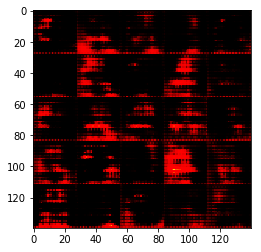

Epoch 1/3... Discriminator Loss: 2.8805... Generator Loss: 0.1115
Epoch 1/3... Discriminator Loss: 1.3823... Generator Loss: 1.9720
Epoch 1/3... Discriminator Loss: 0.8440... Generator Loss: 1.7271
Epoch 1/3... Discriminator Loss: 0.9373... Generator Loss: 1.4584
Epoch 1/3... Discriminator Loss: 1.5788... Generator Loss: 0.6025
Epoch 1/3... Discriminator Loss: 0.4970... Generator Loss: 2.5899


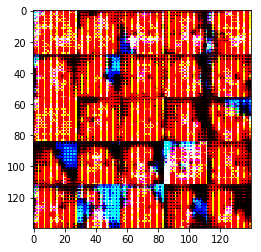

Epoch 1/3... Discriminator Loss: 2.2359... Generator Loss: 0.4245
Epoch 1/3... Discriminator Loss: 0.3832... Generator Loss: 3.7575
Epoch 1/3... Discriminator Loss: 0.3448... Generator Loss: 5.2509
Epoch 1/3... Discriminator Loss: 0.3562... Generator Loss: 4.9422
Epoch 1/3... Discriminator Loss: 1.3656... Generator Loss: 3.6901
Epoch 1/3... Discriminator Loss: 0.5771... Generator Loss: 4.2584


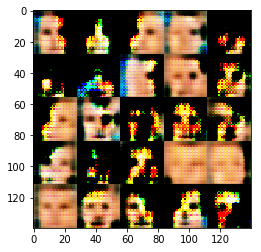

Epoch 1/3... Discriminator Loss: 1.4096... Generator Loss: 1.4450
Epoch 1/3... Discriminator Loss: 0.9659... Generator Loss: 0.9134
Epoch 1/3... Discriminator Loss: 1.2340... Generator Loss: 0.8983
Epoch 1/3... Discriminator Loss: 2.1728... Generator Loss: 0.2371
Epoch 1/3... Discriminator Loss: 1.1630... Generator Loss: 0.7954
Epoch 1/3... Discriminator Loss: 1.2189... Generator Loss: 1.2378
Epoch 1/3... Discriminator Loss: 1.0199... Generator Loss: 1.0087


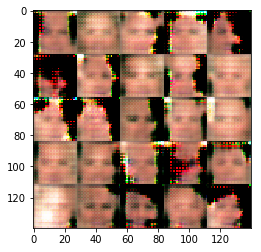

Epoch 1/3... Discriminator Loss: 1.3817... Generator Loss: 0.5112
Epoch 1/3... Discriminator Loss: 1.7826... Generator Loss: 0.4403
Epoch 1/3... Discriminator Loss: 1.1691... Generator Loss: 1.5738
Epoch 1/3... Discriminator Loss: 1.1876... Generator Loss: 1.0385
Epoch 1/3... Discriminator Loss: 0.8744... Generator Loss: 0.9919
Epoch 1/3... Discriminator Loss: 1.0222... Generator Loss: 1.6673


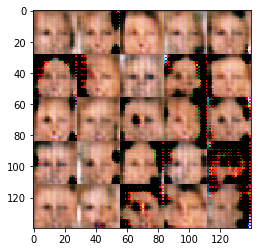

Epoch 1/3... Discriminator Loss: 2.1327... Generator Loss: 2.0823
Epoch 1/3... Discriminator Loss: 1.2791... Generator Loss: 0.9523
Epoch 1/3... Discriminator Loss: 1.3174... Generator Loss: 0.7073
Epoch 1/3... Discriminator Loss: 1.9405... Generator Loss: 0.2976
Epoch 1/3... Discriminator Loss: 1.4061... Generator Loss: 0.8615
Epoch 1/3... Discriminator Loss: 1.1653... Generator Loss: 1.1808


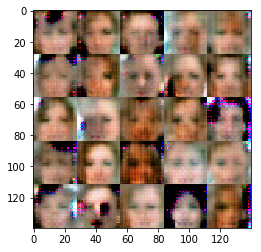

Epoch 1/3... Discriminator Loss: 1.2127... Generator Loss: 1.0411
Epoch 1/3... Discriminator Loss: 1.0833... Generator Loss: 1.0528
Epoch 1/3... Discriminator Loss: 1.1929... Generator Loss: 0.9156
Epoch 1/3... Discriminator Loss: 1.1013... Generator Loss: 1.1530
Epoch 1/3... Discriminator Loss: 1.2409... Generator Loss: 0.7627
Epoch 1/3... Discriminator Loss: 1.3860... Generator Loss: 1.5114


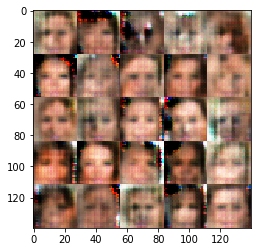

Epoch 1/3... Discriminator Loss: 1.3132... Generator Loss: 1.0281
Epoch 1/3... Discriminator Loss: 1.3489... Generator Loss: 0.6925
Epoch 1/3... Discriminator Loss: 1.4712... Generator Loss: 1.0215
Epoch 1/3... Discriminator Loss: 1.1463... Generator Loss: 1.0613
Epoch 1/3... Discriminator Loss: 1.3102... Generator Loss: 0.8679
Epoch 1/3... Discriminator Loss: 1.3457... Generator Loss: 1.3473
Epoch 1/3... Discriminator Loss: 1.5124... Generator Loss: 1.5079


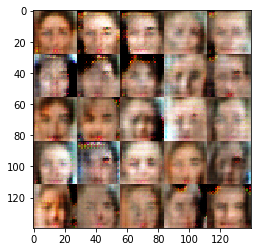

Epoch 1/3... Discriminator Loss: 1.4812... Generator Loss: 1.1608
Epoch 1/3... Discriminator Loss: 1.5075... Generator Loss: 1.3792
Epoch 1/3... Discriminator Loss: 1.0685... Generator Loss: 0.8793
Epoch 1/3... Discriminator Loss: 1.4859... Generator Loss: 0.6761
Epoch 1/3... Discriminator Loss: 1.3908... Generator Loss: 0.8357
Epoch 1/3... Discriminator Loss: 1.3244... Generator Loss: 0.7799


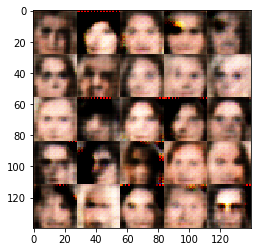

Epoch 1/3... Discriminator Loss: 1.3635... Generator Loss: 0.8154
Epoch 1/3... Discriminator Loss: 1.3642... Generator Loss: 0.8499
Epoch 1/3... Discriminator Loss: 1.3134... Generator Loss: 0.8006
Epoch 1/3... Discriminator Loss: 1.3469... Generator Loss: 0.8652
Epoch 1/3... Discriminator Loss: 1.3899... Generator Loss: 0.9185
Epoch 1/3... Discriminator Loss: 1.3496... Generator Loss: 0.7889


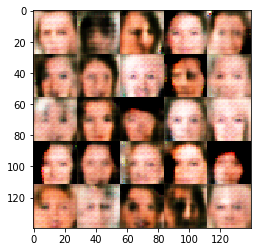

Epoch 1/3... Discriminator Loss: 1.3794... Generator Loss: 0.7895
Epoch 1/3... Discriminator Loss: 1.3650... Generator Loss: 0.8395
Epoch 1/3... Discriminator Loss: 1.3542... Generator Loss: 0.7557
Epoch 1/3... Discriminator Loss: 1.3372... Generator Loss: 0.8428
Epoch 1/3... Discriminator Loss: 1.3603... Generator Loss: 0.8211
Epoch 1/3... Discriminator Loss: 1.4411... Generator Loss: 0.8355


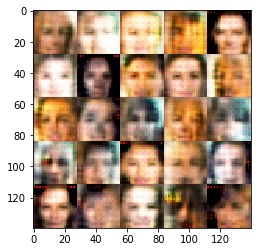

Epoch 1/3... Discriminator Loss: 1.3619... Generator Loss: 0.7737
Epoch 1/3... Discriminator Loss: 1.3439... Generator Loss: 0.7997
Epoch 1/3... Discriminator Loss: 1.3506... Generator Loss: 0.8072
Epoch 1/3... Discriminator Loss: 1.3619... Generator Loss: 0.8617
Epoch 1/3... Discriminator Loss: 1.3667... Generator Loss: 0.8434
Epoch 1/3... Discriminator Loss: 1.4185... Generator Loss: 0.7662
Epoch 1/3... Discriminator Loss: 1.3039... Generator Loss: 0.8587


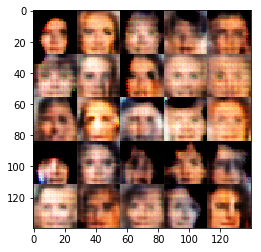

Epoch 1/3... Discriminator Loss: 1.3469... Generator Loss: 0.8659
Epoch 1/3... Discriminator Loss: 1.3360... Generator Loss: 0.8024
Epoch 1/3... Discriminator Loss: 1.3771... Generator Loss: 0.9006
Epoch 1/3... Discriminator Loss: 1.3889... Generator Loss: 0.8365
Epoch 1/3... Discriminator Loss: 1.3124... Generator Loss: 0.8655
Epoch 1/3... Discriminator Loss: 1.3367... Generator Loss: 0.8209


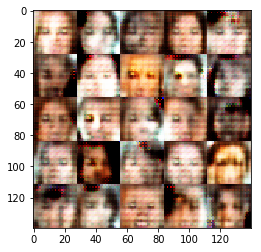

Epoch 1/3... Discriminator Loss: 1.4296... Generator Loss: 0.9083
Epoch 1/3... Discriminator Loss: 1.3157... Generator Loss: 0.9234
Epoch 1/3... Discriminator Loss: 1.4546... Generator Loss: 0.7743
Epoch 1/3... Discriminator Loss: 1.2630... Generator Loss: 0.8811
Epoch 1/3... Discriminator Loss: 1.4084... Generator Loss: 0.7910
Epoch 1/3... Discriminator Loss: 1.3981... Generator Loss: 0.7495


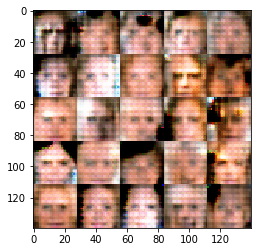

Epoch 1/3... Discriminator Loss: 1.4063... Generator Loss: 0.7485
Epoch 1/3... Discriminator Loss: 1.3394... Generator Loss: 0.8214
Epoch 1/3... Discriminator Loss: 1.3378... Generator Loss: 0.7769
Epoch 1/3... Discriminator Loss: 1.4197... Generator Loss: 0.8063
Epoch 1/3... Discriminator Loss: 1.4745... Generator Loss: 0.8490
Epoch 1/3... Discriminator Loss: 1.3271... Generator Loss: 0.8131


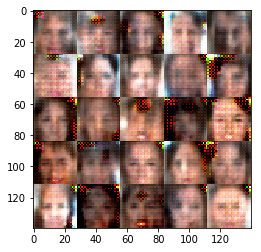

Epoch 1/3... Discriminator Loss: 1.3662... Generator Loss: 0.8919
Epoch 1/3... Discriminator Loss: 1.3494... Generator Loss: 0.9059
Epoch 1/3... Discriminator Loss: 1.3255... Generator Loss: 0.8556
Epoch 1/3... Discriminator Loss: 1.3587... Generator Loss: 0.8771
Epoch 1/3... Discriminator Loss: 1.3607... Generator Loss: 0.8297
Epoch 1/3... Discriminator Loss: 1.3883... Generator Loss: 0.7908
Epoch 1/3... Discriminator Loss: 1.3600... Generator Loss: 0.8832


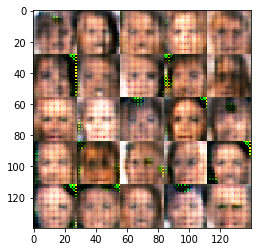

Epoch 1/3... Discriminator Loss: 1.3515... Generator Loss: 0.8422
Epoch 1/3... Discriminator Loss: 1.3410... Generator Loss: 0.8314
Epoch 1/3... Discriminator Loss: 1.3257... Generator Loss: 0.8589
Epoch 1/3... Discriminator Loss: 1.4021... Generator Loss: 0.7726
Epoch 1/3... Discriminator Loss: 1.3800... Generator Loss: 0.8015
Epoch 1/3... Discriminator Loss: 1.3407... Generator Loss: 0.9079


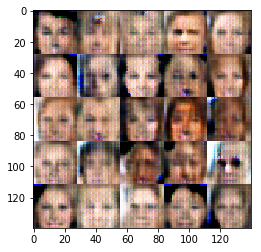

Epoch 1/3... Discriminator Loss: 1.4264... Generator Loss: 0.8695
Epoch 1/3... Discriminator Loss: 1.3428... Generator Loss: 0.8577
Epoch 1/3... Discriminator Loss: 1.3751... Generator Loss: 0.9419
Epoch 1/3... Discriminator Loss: 1.3845... Generator Loss: 0.9334
Epoch 1/3... Discriminator Loss: 1.3946... Generator Loss: 0.8312
Epoch 1/3... Discriminator Loss: 1.3850... Generator Loss: 0.8409


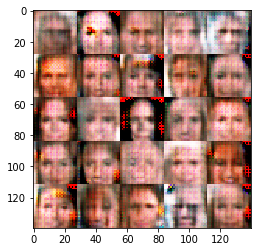

Epoch 1/3... Discriminator Loss: 1.3412... Generator Loss: 0.7743
Epoch 1/3... Discriminator Loss: 1.4186... Generator Loss: 0.7651
Epoch 1/3... Discriminator Loss: 1.3996... Generator Loss: 0.7508
Epoch 1/3... Discriminator Loss: 1.3874... Generator Loss: 0.8609
Epoch 1/3... Discriminator Loss: 1.3706... Generator Loss: 0.7880
Epoch 1/3... Discriminator Loss: 1.3951... Generator Loss: 0.8970


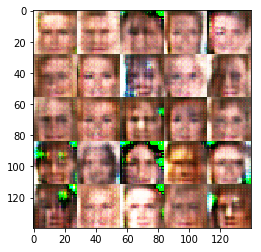

Epoch 1/3... Discriminator Loss: 1.3744... Generator Loss: 0.8098
Epoch 1/3... Discriminator Loss: 1.3863... Generator Loss: 0.8216
Epoch 1/3... Discriminator Loss: 1.3414... Generator Loss: 0.8645
Epoch 1/3... Discriminator Loss: 1.3188... Generator Loss: 0.7577
Epoch 1/3... Discriminator Loss: 1.3857... Generator Loss: 0.7694
Epoch 1/3... Discriminator Loss: 1.4269... Generator Loss: 0.7421
Epoch 1/3... Discriminator Loss: 1.3662... Generator Loss: 0.8339


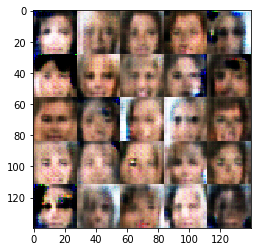

Epoch 1/3... Discriminator Loss: 1.4249... Generator Loss: 0.8379
Epoch 1/3... Discriminator Loss: 1.3815... Generator Loss: 0.7449
Epoch 1/3... Discriminator Loss: 1.4015... Generator Loss: 0.8004
Epoch 1/3... Discriminator Loss: 1.3515... Generator Loss: 0.8581
Epoch 1/3... Discriminator Loss: 1.4030... Generator Loss: 0.8162
Epoch 1/3... Discriminator Loss: 1.3548... Generator Loss: 0.8698


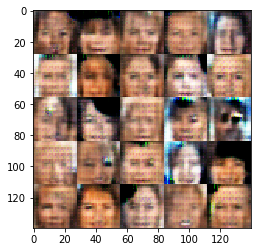

Epoch 1/3... Discriminator Loss: 1.4086... Generator Loss: 0.8490
Epoch 1/3... Discriminator Loss: 1.4045... Generator Loss: 0.8710
Epoch 1/3... Discriminator Loss: 1.3537... Generator Loss: 0.8219
Epoch 1/3... Discriminator Loss: 1.3395... Generator Loss: 0.7374
Epoch 1/3... Discriminator Loss: 1.4121... Generator Loss: 0.7749
Epoch 1/3... Discriminator Loss: 1.3399... Generator Loss: 0.8218


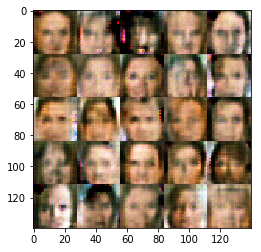

Epoch 1/3... Discriminator Loss: 1.3962... Generator Loss: 0.7262
Epoch 1/3... Discriminator Loss: 1.3171... Generator Loss: 1.0442
Epoch 1/3... Discriminator Loss: 1.4719... Generator Loss: 0.7220
Epoch 1/3... Discriminator Loss: 1.3661... Generator Loss: 0.6700
Epoch 1/3... Discriminator Loss: 1.3882... Generator Loss: 0.7514
Epoch 1/3... Discriminator Loss: 1.3841... Generator Loss: 0.8723


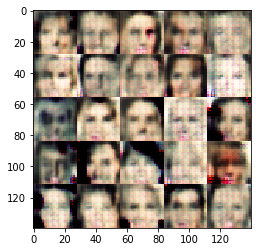

Epoch 1/3... Discriminator Loss: 1.3648... Generator Loss: 0.8119
Epoch 1/3... Discriminator Loss: 1.3948... Generator Loss: 0.8287
Epoch 1/3... Discriminator Loss: 1.4234... Generator Loss: 0.7354
Epoch 1/3... Discriminator Loss: 1.4053... Generator Loss: 0.8050
Epoch 1/3... Discriminator Loss: 1.3368... Generator Loss: 0.8104
Epoch 1/3... Discriminator Loss: 1.5264... Generator Loss: 0.6584
Epoch 1/3... Discriminator Loss: 1.6383... Generator Loss: 0.9289


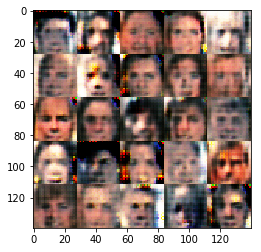

Epoch 1/3... Discriminator Loss: 1.4072... Generator Loss: 0.8029
Epoch 1/3... Discriminator Loss: 1.3989... Generator Loss: 0.7366
Epoch 1/3... Discriminator Loss: 1.1809... Generator Loss: 1.2598
Epoch 1/3... Discriminator Loss: 1.3322... Generator Loss: 0.9452
Epoch 1/3... Discriminator Loss: 1.4305... Generator Loss: 0.7638
Epoch 1/3... Discriminator Loss: 1.3018... Generator Loss: 0.7725


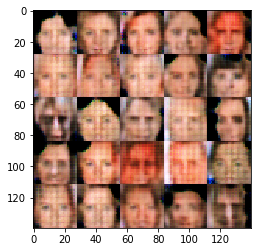

Epoch 1/3... Discriminator Loss: 1.3464... Generator Loss: 0.8479
Epoch 1/3... Discriminator Loss: 1.3867... Generator Loss: 0.7479
Epoch 1/3... Discriminator Loss: 1.3561... Generator Loss: 0.8051
Epoch 1/3... Discriminator Loss: 1.4151... Generator Loss: 0.8568
Epoch 1/3... Discriminator Loss: 1.3735... Generator Loss: 0.7102
Epoch 1/3... Discriminator Loss: 1.4122... Generator Loss: 0.7785


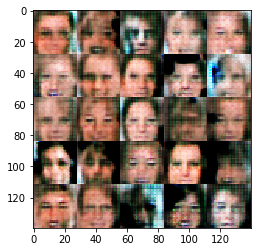

Epoch 1/3... Discriminator Loss: 1.4144... Generator Loss: 0.9417
Epoch 1/3... Discriminator Loss: 1.5179... Generator Loss: 0.4946
Epoch 1/3... Discriminator Loss: 1.2914... Generator Loss: 0.8300
Epoch 1/3... Discriminator Loss: 1.3919... Generator Loss: 0.8241
Epoch 1/3... Discriminator Loss: 1.4084... Generator Loss: 0.7246
Epoch 1/3... Discriminator Loss: 1.3206... Generator Loss: 0.7682


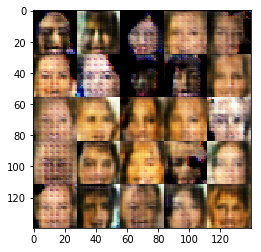

Epoch 1/3... Discriminator Loss: 1.4473... Generator Loss: 0.8274
Epoch 1/3... Discriminator Loss: 1.3991... Generator Loss: 1.2046
Epoch 1/3... Discriminator Loss: 1.3805... Generator Loss: 0.8100
Epoch 1/3... Discriminator Loss: 1.4505... Generator Loss: 1.1462
Epoch 1/3... Discriminator Loss: 1.4096... Generator Loss: 0.7017
Epoch 1/3... Discriminator Loss: 1.3424... Generator Loss: 1.1199
Epoch 1/3... Discriminator Loss: 1.2441... Generator Loss: 0.8293


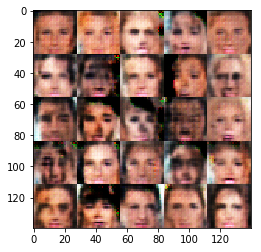

Epoch 1/3... Discriminator Loss: 1.3779... Generator Loss: 0.8842
Epoch 1/3... Discriminator Loss: 1.3444... Generator Loss: 0.7834
Epoch 1/3... Discriminator Loss: 1.4640... Generator Loss: 0.6545
Epoch 1/3... Discriminator Loss: 1.4135... Generator Loss: 1.0231
Epoch 1/3... Discriminator Loss: 1.3986... Generator Loss: 0.9128
Epoch 1/3... Discriminator Loss: 1.3823... Generator Loss: 0.5853


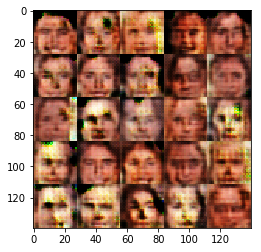

Epoch 1/3... Discriminator Loss: 1.1894... Generator Loss: 0.9402
Epoch 1/3... Discriminator Loss: 1.2984... Generator Loss: 0.8040
Epoch 1/3... Discriminator Loss: 1.4496... Generator Loss: 0.5350
Epoch 1/3... Discriminator Loss: 1.2583... Generator Loss: 0.8283
Epoch 1/3... Discriminator Loss: 1.4297... Generator Loss: 0.8006
Epoch 1/3... Discriminator Loss: 1.2511... Generator Loss: 0.9736


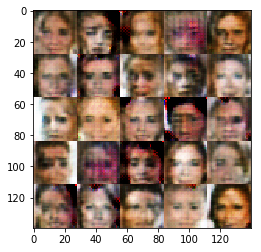

Epoch 1/3... Discriminator Loss: 1.3623... Generator Loss: 0.8387
Epoch 1/3... Discriminator Loss: 1.3648... Generator Loss: 0.9193
Epoch 1/3... Discriminator Loss: 1.3293... Generator Loss: 0.7687
Epoch 1/3... Discriminator Loss: 1.4919... Generator Loss: 1.2999
Epoch 1/3... Discriminator Loss: 1.3222... Generator Loss: 0.8966
Epoch 1/3... Discriminator Loss: 1.4777... Generator Loss: 0.7438


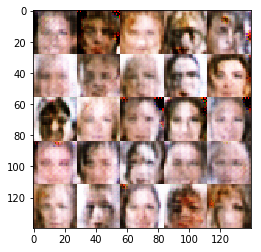

Epoch 1/3... Discriminator Loss: 1.2517... Generator Loss: 0.8452
Epoch 1/3... Discriminator Loss: 1.3284... Generator Loss: 1.0254
Epoch 1/3... Discriminator Loss: 1.3417... Generator Loss: 0.8544
Epoch 1/3... Discriminator Loss: 1.4333... Generator Loss: 0.6579
Epoch 2/3... Discriminator Loss: 1.2821... Generator Loss: 0.8134
Epoch 2/3... Discriminator Loss: 1.2831... Generator Loss: 0.8254
Epoch 2/3... Discriminator Loss: 1.3100... Generator Loss: 0.8814


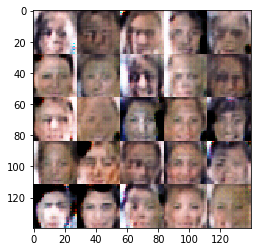

Epoch 2/3... Discriminator Loss: 1.3434... Generator Loss: 0.9147
Epoch 2/3... Discriminator Loss: 1.4490... Generator Loss: 0.9825
Epoch 2/3... Discriminator Loss: 1.2708... Generator Loss: 0.7732
Epoch 2/3... Discriminator Loss: 1.3187... Generator Loss: 0.7963
Epoch 2/3... Discriminator Loss: 1.3833... Generator Loss: 0.6580
Epoch 2/3... Discriminator Loss: 1.3202... Generator Loss: 0.7832


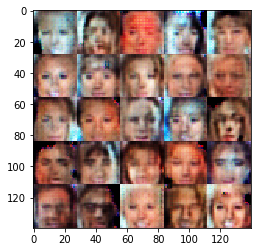

Epoch 2/3... Discriminator Loss: 1.3938... Generator Loss: 0.8541
Epoch 2/3... Discriminator Loss: 1.3510... Generator Loss: 0.7281
Epoch 2/3... Discriminator Loss: 1.5099... Generator Loss: 0.6521
Epoch 2/3... Discriminator Loss: 1.5843... Generator Loss: 0.5805
Epoch 2/3... Discriminator Loss: 1.3644... Generator Loss: 0.8557
Epoch 2/3... Discriminator Loss: 1.3664... Generator Loss: 0.8828


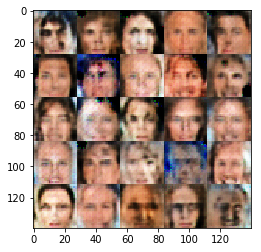

Epoch 2/3... Discriminator Loss: 1.5483... Generator Loss: 0.4734
Epoch 2/3... Discriminator Loss: 1.3883... Generator Loss: 0.6640
Epoch 2/3... Discriminator Loss: 1.3024... Generator Loss: 0.8706
Epoch 2/3... Discriminator Loss: 1.3354... Generator Loss: 0.7036
Epoch 2/3... Discriminator Loss: 1.4308... Generator Loss: 0.7162
Epoch 2/3... Discriminator Loss: 1.4787... Generator Loss: 0.6273


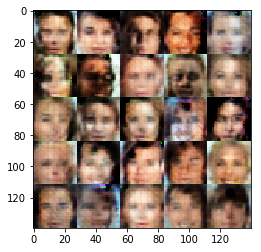

Epoch 2/3... Discriminator Loss: 1.3137... Generator Loss: 0.7802
Epoch 2/3... Discriminator Loss: 1.3423... Generator Loss: 0.6720
Epoch 2/3... Discriminator Loss: 1.3891... Generator Loss: 0.7627
Epoch 2/3... Discriminator Loss: 1.3351... Generator Loss: 0.6063
Epoch 2/3... Discriminator Loss: 1.3398... Generator Loss: 0.8720
Epoch 2/3... Discriminator Loss: 1.3522... Generator Loss: 0.8260
Epoch 2/3... Discriminator Loss: 1.3531... Generator Loss: 0.7592


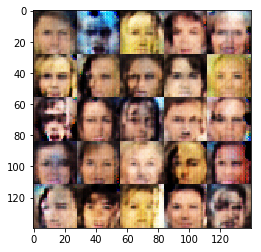

Epoch 2/3... Discriminator Loss: 1.3220... Generator Loss: 0.9260
Epoch 2/3... Discriminator Loss: 1.2700... Generator Loss: 0.8449
Epoch 2/3... Discriminator Loss: 1.3303... Generator Loss: 0.7188
Epoch 2/3... Discriminator Loss: 1.2773... Generator Loss: 0.8819
Epoch 2/3... Discriminator Loss: 1.3171... Generator Loss: 0.7938
Epoch 2/3... Discriminator Loss: 1.4748... Generator Loss: 0.5163


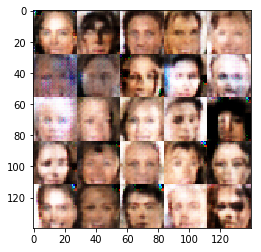

Epoch 2/3... Discriminator Loss: 1.6192... Generator Loss: 0.4310
Epoch 2/3... Discriminator Loss: 1.2475... Generator Loss: 1.0191
Epoch 2/3... Discriminator Loss: 1.3889... Generator Loss: 0.6515
Epoch 2/3... Discriminator Loss: 1.3908... Generator Loss: 0.6383
Epoch 2/3... Discriminator Loss: 1.2870... Generator Loss: 0.9492
Epoch 2/3... Discriminator Loss: 1.3615... Generator Loss: 0.9514


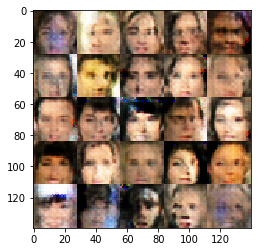

Epoch 2/3... Discriminator Loss: 1.3718... Generator Loss: 0.6641
Epoch 2/3... Discriminator Loss: 1.4507... Generator Loss: 0.8065
Epoch 2/3... Discriminator Loss: 1.3023... Generator Loss: 0.8108
Epoch 2/3... Discriminator Loss: 1.3989... Generator Loss: 1.0989
Epoch 2/3... Discriminator Loss: 1.4467... Generator Loss: 0.6731
Epoch 2/3... Discriminator Loss: 1.2327... Generator Loss: 0.9214


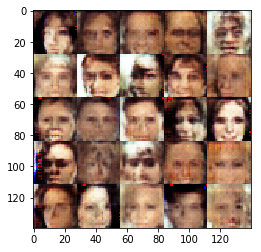

Epoch 2/3... Discriminator Loss: 1.4128... Generator Loss: 0.6245
Epoch 2/3... Discriminator Loss: 1.4085... Generator Loss: 0.5850
Epoch 2/3... Discriminator Loss: 1.2907... Generator Loss: 0.8532
Epoch 2/3... Discriminator Loss: 1.3350... Generator Loss: 0.6735
Epoch 2/3... Discriminator Loss: 1.2553... Generator Loss: 0.8661
Epoch 2/3... Discriminator Loss: 1.2213... Generator Loss: 0.7348
Epoch 2/3... Discriminator Loss: 1.3739... Generator Loss: 0.7043


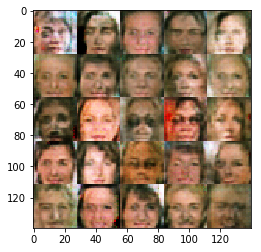

Epoch 2/3... Discriminator Loss: 1.3810... Generator Loss: 0.6851
Epoch 2/3... Discriminator Loss: 1.2598... Generator Loss: 1.0023
Epoch 2/3... Discriminator Loss: 1.4268... Generator Loss: 0.6664
Epoch 2/3... Discriminator Loss: 1.3186... Generator Loss: 0.8986
Epoch 2/3... Discriminator Loss: 1.3522... Generator Loss: 0.7835
Epoch 2/3... Discriminator Loss: 1.2457... Generator Loss: 0.8592


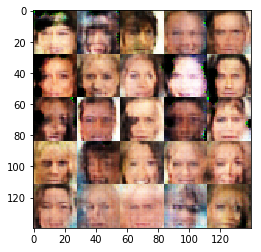

Epoch 2/3... Discriminator Loss: 1.3479... Generator Loss: 0.7652
Epoch 2/3... Discriminator Loss: 1.4160... Generator Loss: 0.8250
Epoch 2/3... Discriminator Loss: 1.2936... Generator Loss: 0.9154
Epoch 2/3... Discriminator Loss: 1.4058... Generator Loss: 0.9498
Epoch 2/3... Discriminator Loss: 1.3299... Generator Loss: 0.7520
Epoch 2/3... Discriminator Loss: 1.3783... Generator Loss: 0.8280


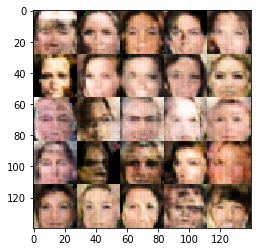

Epoch 2/3... Discriminator Loss: 1.3939... Generator Loss: 0.7419
Epoch 2/3... Discriminator Loss: 1.4733... Generator Loss: 0.5190
Epoch 2/3... Discriminator Loss: 1.3262... Generator Loss: 0.7481
Epoch 2/3... Discriminator Loss: 1.3465... Generator Loss: 0.8783
Epoch 2/3... Discriminator Loss: 1.6083... Generator Loss: 0.8323
Epoch 2/3... Discriminator Loss: 1.2564... Generator Loss: 0.9075


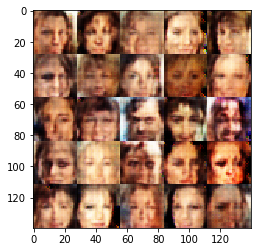

Epoch 2/3... Discriminator Loss: 1.4367... Generator Loss: 0.6409
Epoch 2/3... Discriminator Loss: 1.3663... Generator Loss: 0.7697
Epoch 2/3... Discriminator Loss: 1.3111... Generator Loss: 0.8770
Epoch 2/3... Discriminator Loss: 1.3121... Generator Loss: 0.7724
Epoch 2/3... Discriminator Loss: 1.3484... Generator Loss: 0.7713
Epoch 2/3... Discriminator Loss: 1.2865... Generator Loss: 0.8254
Epoch 2/3... Discriminator Loss: 1.3179... Generator Loss: 1.3440


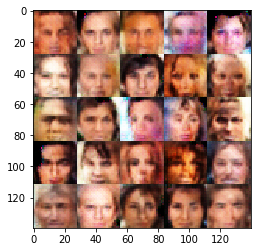

Epoch 2/3... Discriminator Loss: 1.2906... Generator Loss: 0.8452
Epoch 2/3... Discriminator Loss: 1.3738... Generator Loss: 0.7504
Epoch 2/3... Discriminator Loss: 1.5448... Generator Loss: 0.4942
Epoch 2/3... Discriminator Loss: 1.3049... Generator Loss: 0.9204
Epoch 2/3... Discriminator Loss: 1.4697... Generator Loss: 0.7370
Epoch 2/3... Discriminator Loss: 1.3631... Generator Loss: 0.7733


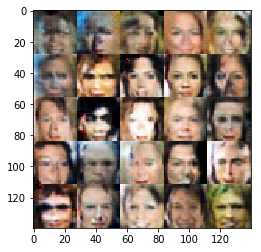

Epoch 2/3... Discriminator Loss: 1.3871... Generator Loss: 0.8520
Epoch 2/3... Discriminator Loss: 1.3630... Generator Loss: 0.8569
Epoch 2/3... Discriminator Loss: 1.3463... Generator Loss: 0.9049
Epoch 2/3... Discriminator Loss: 1.4224... Generator Loss: 0.7107
Epoch 2/3... Discriminator Loss: 1.3009... Generator Loss: 0.7430
Epoch 2/3... Discriminator Loss: 1.3849... Generator Loss: 0.7132


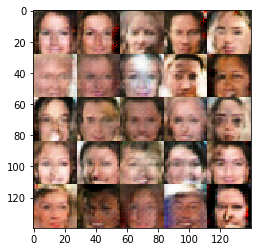

Epoch 2/3... Discriminator Loss: 1.3388... Generator Loss: 0.8388
Epoch 2/3... Discriminator Loss: 1.4281... Generator Loss: 0.8027
Epoch 2/3... Discriminator Loss: 1.3571... Generator Loss: 0.7216
Epoch 2/3... Discriminator Loss: 1.3362... Generator Loss: 0.7973
Epoch 2/3... Discriminator Loss: 1.3266... Generator Loss: 0.7925
Epoch 2/3... Discriminator Loss: 1.2967... Generator Loss: 0.7711


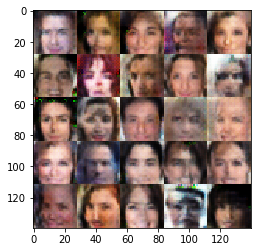

Epoch 2/3... Discriminator Loss: 1.3000... Generator Loss: 0.7494
Epoch 2/3... Discriminator Loss: 1.3445... Generator Loss: 0.7933
Epoch 2/3... Discriminator Loss: 1.3741... Generator Loss: 0.7284
Epoch 2/3... Discriminator Loss: 1.2345... Generator Loss: 0.9329
Epoch 2/3... Discriminator Loss: 1.4075... Generator Loss: 0.8221
Epoch 2/3... Discriminator Loss: 1.3668... Generator Loss: 0.7152
Epoch 2/3... Discriminator Loss: 1.3461... Generator Loss: 0.7004


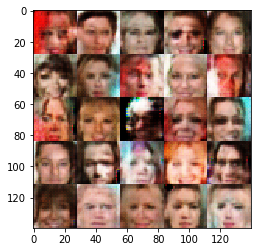

Epoch 2/3... Discriminator Loss: 1.4710... Generator Loss: 0.8413
Epoch 2/3... Discriminator Loss: 1.3240... Generator Loss: 0.7823
Epoch 2/3... Discriminator Loss: 1.3669... Generator Loss: 0.8670
Epoch 2/3... Discriminator Loss: 1.4636... Generator Loss: 0.7319
Epoch 2/3... Discriminator Loss: 1.4624... Generator Loss: 0.7190
Epoch 2/3... Discriminator Loss: 1.3968... Generator Loss: 0.7543


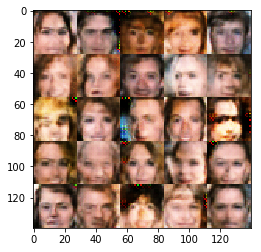

Epoch 2/3... Discriminator Loss: 1.3162... Generator Loss: 0.7885
Epoch 2/3... Discriminator Loss: 1.3543... Generator Loss: 0.7651
Epoch 2/3... Discriminator Loss: 1.2734... Generator Loss: 0.8949
Epoch 2/3... Discriminator Loss: 1.5418... Generator Loss: 0.5062
Epoch 2/3... Discriminator Loss: 1.3189... Generator Loss: 0.7594
Epoch 2/3... Discriminator Loss: 1.2488... Generator Loss: 0.8187


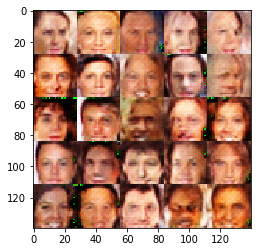

Epoch 2/3... Discriminator Loss: 1.4314... Generator Loss: 0.6759
Epoch 2/3... Discriminator Loss: 1.3150... Generator Loss: 0.9471
Epoch 2/3... Discriminator Loss: 1.2859... Generator Loss: 0.8910
Epoch 2/3... Discriminator Loss: 1.3257... Generator Loss: 1.1008
Epoch 2/3... Discriminator Loss: 1.3234... Generator Loss: 0.8568
Epoch 2/3... Discriminator Loss: 1.4597... Generator Loss: 0.6936


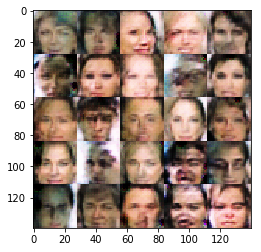

Epoch 2/3... Discriminator Loss: 1.3268... Generator Loss: 0.8697
Epoch 2/3... Discriminator Loss: 1.3671... Generator Loss: 0.7696
Epoch 2/3... Discriminator Loss: 1.1817... Generator Loss: 1.0217
Epoch 2/3... Discriminator Loss: 1.3687... Generator Loss: 0.8409
Epoch 2/3... Discriminator Loss: 1.3782... Generator Loss: 0.7836
Epoch 2/3... Discriminator Loss: 1.3482... Generator Loss: 0.7587
Epoch 2/3... Discriminator Loss: 1.2832... Generator Loss: 0.8546


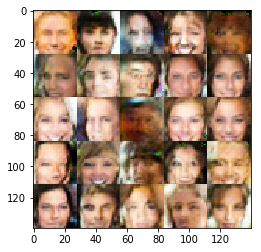

Epoch 2/3... Discriminator Loss: 1.4540... Generator Loss: 0.6274
Epoch 2/3... Discriminator Loss: 1.4305... Generator Loss: 1.4402
Epoch 2/3... Discriminator Loss: 1.3055... Generator Loss: 0.7764
Epoch 2/3... Discriminator Loss: 1.4337... Generator Loss: 0.6678
Epoch 2/3... Discriminator Loss: 1.3105... Generator Loss: 0.7496
Epoch 2/3... Discriminator Loss: 1.2482... Generator Loss: 0.8670


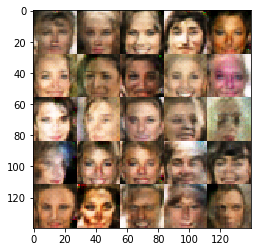

Epoch 2/3... Discriminator Loss: 1.3259... Generator Loss: 0.8541
Epoch 2/3... Discriminator Loss: 1.2991... Generator Loss: 0.8020
Epoch 2/3... Discriminator Loss: 1.3796... Generator Loss: 0.8016
Epoch 2/3... Discriminator Loss: 1.3328... Generator Loss: 0.7885
Epoch 2/3... Discriminator Loss: 1.3612... Generator Loss: 0.9078
Epoch 2/3... Discriminator Loss: 1.3635... Generator Loss: 0.8002


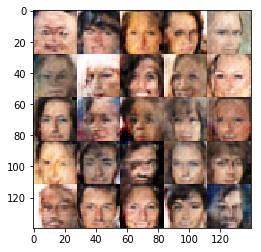

Epoch 2/3... Discriminator Loss: 1.4164... Generator Loss: 0.7580
Epoch 2/3... Discriminator Loss: 1.3966... Generator Loss: 0.7908
Epoch 2/3... Discriminator Loss: 1.3622... Generator Loss: 0.8191
Epoch 2/3... Discriminator Loss: 1.3119... Generator Loss: 0.8081
Epoch 2/3... Discriminator Loss: 1.3257... Generator Loss: 0.8505
Epoch 2/3... Discriminator Loss: 1.3552... Generator Loss: 0.7871


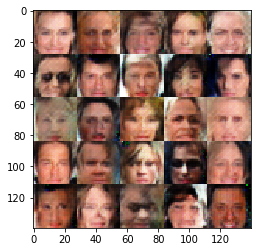

Epoch 2/3... Discriminator Loss: 1.3626... Generator Loss: 0.7977
Epoch 2/3... Discriminator Loss: 1.2549... Generator Loss: 0.8969
Epoch 2/3... Discriminator Loss: 1.3513... Generator Loss: 0.7454
Epoch 2/3... Discriminator Loss: 1.2568... Generator Loss: 0.7713
Epoch 2/3... Discriminator Loss: 1.3307... Generator Loss: 0.8555
Epoch 2/3... Discriminator Loss: 1.3222... Generator Loss: 0.8388
Epoch 2/3... Discriminator Loss: 1.3226... Generator Loss: 0.7321


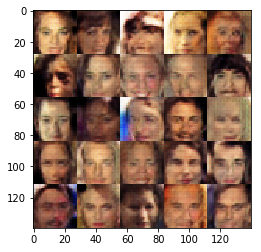

Epoch 2/3... Discriminator Loss: 1.2917... Generator Loss: 0.8145
Epoch 2/3... Discriminator Loss: 1.3377... Generator Loss: 0.7196
Epoch 2/3... Discriminator Loss: 1.3678... Generator Loss: 0.7016
Epoch 2/3... Discriminator Loss: 1.3486... Generator Loss: 0.7722
Epoch 2/3... Discriminator Loss: 1.3655... Generator Loss: 0.7566
Epoch 2/3... Discriminator Loss: 1.4915... Generator Loss: 0.8459


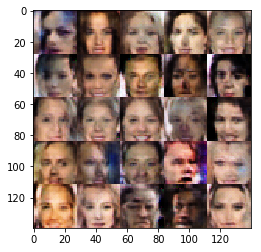

Epoch 2/3... Discriminator Loss: 1.3239... Generator Loss: 0.8283
Epoch 2/3... Discriminator Loss: 1.3816... Generator Loss: 0.8107
Epoch 2/3... Discriminator Loss: 1.3012... Generator Loss: 0.8828
Epoch 2/3... Discriminator Loss: 1.3735... Generator Loss: 0.7913
Epoch 2/3... Discriminator Loss: 1.3331... Generator Loss: 0.7593
Epoch 2/3... Discriminator Loss: 1.4272... Generator Loss: 1.0050


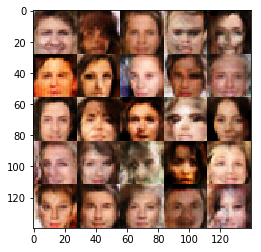

Epoch 2/3... Discriminator Loss: 1.3513... Generator Loss: 0.7935
Epoch 2/3... Discriminator Loss: 1.4254... Generator Loss: 0.7651
Epoch 2/3... Discriminator Loss: 1.3745... Generator Loss: 0.7342
Epoch 2/3... Discriminator Loss: 1.4193... Generator Loss: 0.8021
Epoch 2/3... Discriminator Loss: 1.2234... Generator Loss: 0.8161
Epoch 2/3... Discriminator Loss: 1.4013... Generator Loss: 0.7812


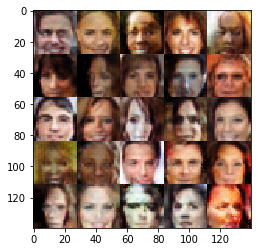

Epoch 2/3... Discriminator Loss: 1.3578... Generator Loss: 0.7827
Epoch 2/3... Discriminator Loss: 1.4823... Generator Loss: 0.6259
Epoch 2/3... Discriminator Loss: 1.3568... Generator Loss: 0.7947
Epoch 2/3... Discriminator Loss: 1.3196... Generator Loss: 0.8289
Epoch 2/3... Discriminator Loss: 1.3620... Generator Loss: 0.8230
Epoch 2/3... Discriminator Loss: 1.3937... Generator Loss: 0.7565
Epoch 2/3... Discriminator Loss: 1.3957... Generator Loss: 0.8470


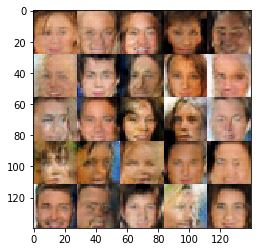

Epoch 2/3... Discriminator Loss: 1.3833... Generator Loss: 0.7509
Epoch 2/3... Discriminator Loss: 1.4094... Generator Loss: 0.6977
Epoch 2/3... Discriminator Loss: 1.3652... Generator Loss: 0.8493
Epoch 2/3... Discriminator Loss: 1.4127... Generator Loss: 0.8482
Epoch 2/3... Discriminator Loss: 1.2867... Generator Loss: 0.8439
Epoch 2/3... Discriminator Loss: 1.3885... Generator Loss: 0.7785


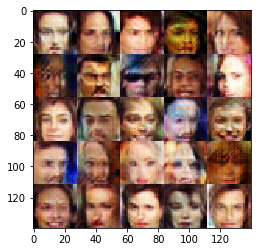

Epoch 2/3... Discriminator Loss: 1.3562... Generator Loss: 1.0219
Epoch 2/3... Discriminator Loss: 1.3804... Generator Loss: 0.6671
Epoch 2/3... Discriminator Loss: 1.3103... Generator Loss: 0.9122
Epoch 2/3... Discriminator Loss: 1.3284... Generator Loss: 0.8844
Epoch 2/3... Discriminator Loss: 1.3225... Generator Loss: 0.8382
Epoch 2/3... Discriminator Loss: 1.4068... Generator Loss: 0.6440


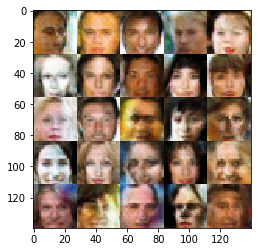

Epoch 2/3... Discriminator Loss: 1.2778... Generator Loss: 0.8971
Epoch 2/3... Discriminator Loss: 1.4165... Generator Loss: 0.8704
Epoch 2/3... Discriminator Loss: 1.4033... Generator Loss: 1.0050
Epoch 2/3... Discriminator Loss: 1.2853... Generator Loss: 0.9057
Epoch 2/3... Discriminator Loss: 1.3174... Generator Loss: 0.8336
Epoch 2/3... Discriminator Loss: 1.3411... Generator Loss: 0.8717


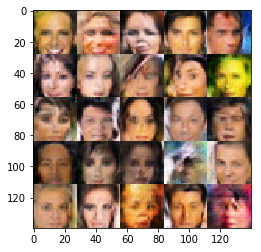

Epoch 2/3... Discriminator Loss: 1.3903... Generator Loss: 0.7973
Epoch 2/3... Discriminator Loss: 1.3888... Generator Loss: 0.7373
Epoch 3/3... Discriminator Loss: 1.3308... Generator Loss: 0.8720
Epoch 3/3... Discriminator Loss: 1.3462... Generator Loss: 0.9018
Epoch 3/3... Discriminator Loss: 1.3526... Generator Loss: 0.8148
Epoch 3/3... Discriminator Loss: 1.3641... Generator Loss: 0.8027
Epoch 3/3... Discriminator Loss: 1.4020... Generator Loss: 0.6698


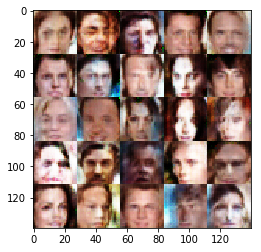

Epoch 3/3... Discriminator Loss: 1.4142... Generator Loss: 0.7316
Epoch 3/3... Discriminator Loss: 1.3076... Generator Loss: 0.8555
Epoch 3/3... Discriminator Loss: 1.2231... Generator Loss: 0.9496
Epoch 3/3... Discriminator Loss: 1.3314... Generator Loss: 0.7920
Epoch 3/3... Discriminator Loss: 1.3324... Generator Loss: 0.7451
Epoch 3/3... Discriminator Loss: 1.4126... Generator Loss: 0.6388


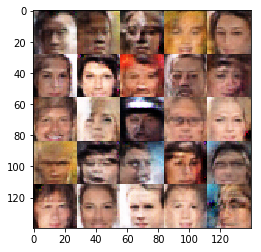

Epoch 3/3... Discriminator Loss: 1.3376... Generator Loss: 0.7234
Epoch 3/3... Discriminator Loss: 1.3384... Generator Loss: 0.8138
Epoch 3/3... Discriminator Loss: 1.3505... Generator Loss: 0.8583
Epoch 3/3... Discriminator Loss: 1.2232... Generator Loss: 0.9338
Epoch 3/3... Discriminator Loss: 1.3589... Generator Loss: 0.8242
Epoch 3/3... Discriminator Loss: 1.3100... Generator Loss: 0.7809


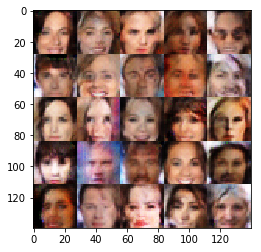

Epoch 3/3... Discriminator Loss: 1.4412... Generator Loss: 0.6323
Epoch 3/3... Discriminator Loss: 1.3599... Generator Loss: 0.8635
Epoch 3/3... Discriminator Loss: 1.3801... Generator Loss: 0.7726
Epoch 3/3... Discriminator Loss: 1.3683... Generator Loss: 0.7640
Epoch 3/3... Discriminator Loss: 1.3411... Generator Loss: 1.0331
Epoch 3/3... Discriminator Loss: 1.3034... Generator Loss: 0.8618


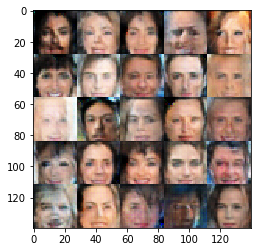

Epoch 3/3... Discriminator Loss: 1.3919... Generator Loss: 0.6859
Epoch 3/3... Discriminator Loss: 1.3135... Generator Loss: 0.8373
Epoch 3/3... Discriminator Loss: 1.3700... Generator Loss: 0.7797
Epoch 3/3... Discriminator Loss: 1.3338... Generator Loss: 0.7969
Epoch 3/3... Discriminator Loss: 1.4145... Generator Loss: 0.8622
Epoch 3/3... Discriminator Loss: 1.3506... Generator Loss: 0.8021
Epoch 3/3... Discriminator Loss: 1.4804... Generator Loss: 0.5748


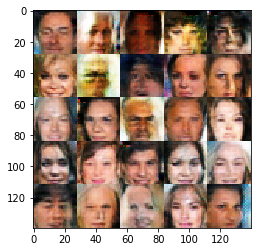

Epoch 3/3... Discriminator Loss: 1.3136... Generator Loss: 0.8181
Epoch 3/3... Discriminator Loss: 1.6016... Generator Loss: 0.4224
Epoch 3/3... Discriminator Loss: 1.3576... Generator Loss: 0.7867
Epoch 3/3... Discriminator Loss: 1.3362... Generator Loss: 0.7862
Epoch 3/3... Discriminator Loss: 1.3987... Generator Loss: 0.7663
Epoch 3/3... Discriminator Loss: 1.2872... Generator Loss: 0.9042


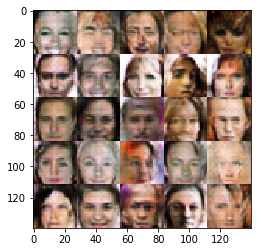

Epoch 3/3... Discriminator Loss: 1.4047... Generator Loss: 0.8316
Epoch 3/3... Discriminator Loss: 1.3517... Generator Loss: 0.9065
Epoch 3/3... Discriminator Loss: 1.4593... Generator Loss: 0.5160
Epoch 3/3... Discriminator Loss: 1.2886... Generator Loss: 0.8380
Epoch 3/3... Discriminator Loss: 1.4044... Generator Loss: 0.7578
Epoch 3/3... Discriminator Loss: 1.3062... Generator Loss: 0.8255


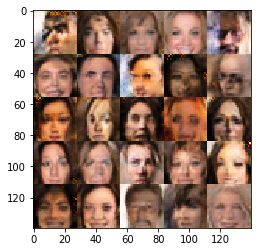

Epoch 3/3... Discriminator Loss: 1.3078... Generator Loss: 0.8261
Epoch 3/3... Discriminator Loss: 1.3336... Generator Loss: 0.8234
Epoch 3/3... Discriminator Loss: 1.3514... Generator Loss: 0.8261
Epoch 3/3... Discriminator Loss: 1.3825... Generator Loss: 0.7584
Epoch 3/3... Discriminator Loss: 1.3590... Generator Loss: 0.5965
Epoch 3/3... Discriminator Loss: 1.3621... Generator Loss: 0.7757


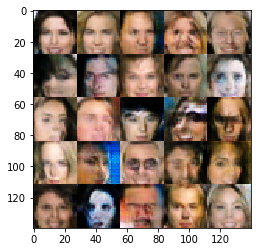

Epoch 3/3... Discriminator Loss: 1.3163... Generator Loss: 0.8304
Epoch 3/3... Discriminator Loss: 1.3555... Generator Loss: 0.7540
Epoch 3/3... Discriminator Loss: 1.3883... Generator Loss: 0.7544
Epoch 3/3... Discriminator Loss: 1.4592... Generator Loss: 0.7182
Epoch 3/3... Discriminator Loss: 1.3943... Generator Loss: 0.7951
Epoch 3/3... Discriminator Loss: 1.3562... Generator Loss: 0.7585
Epoch 3/3... Discriminator Loss: 1.3999... Generator Loss: 0.6897


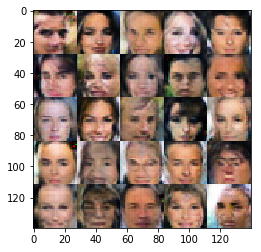

Epoch 3/3... Discriminator Loss: 1.4477... Generator Loss: 0.8890
Epoch 3/3... Discriminator Loss: 1.4443... Generator Loss: 0.7087
Epoch 3/3... Discriminator Loss: 1.2877... Generator Loss: 0.8596
Epoch 3/3... Discriminator Loss: 1.4009... Generator Loss: 0.8634
Epoch 3/3... Discriminator Loss: 1.3452... Generator Loss: 0.8087
Epoch 3/3... Discriminator Loss: 1.3552... Generator Loss: 0.8228


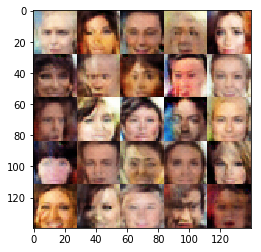

Epoch 3/3... Discriminator Loss: 1.3345... Generator Loss: 0.8746
Epoch 3/3... Discriminator Loss: 1.3546... Generator Loss: 0.7548
Epoch 3/3... Discriminator Loss: 1.3448... Generator Loss: 0.8094
Epoch 3/3... Discriminator Loss: 1.3517... Generator Loss: 0.7887
Epoch 3/3... Discriminator Loss: 1.3698... Generator Loss: 0.8193
Epoch 3/3... Discriminator Loss: 1.2486... Generator Loss: 0.8918


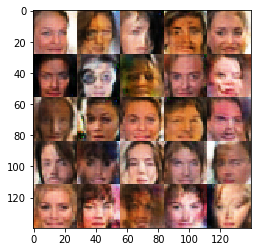

Epoch 3/3... Discriminator Loss: 1.3556... Generator Loss: 0.8152
Epoch 3/3... Discriminator Loss: 1.4071... Generator Loss: 0.7944
Epoch 3/3... Discriminator Loss: 1.3187... Generator Loss: 0.8284
Epoch 3/3... Discriminator Loss: 1.3910... Generator Loss: 0.8175
Epoch 3/3... Discriminator Loss: 1.3528... Generator Loss: 0.8264
Epoch 3/3... Discriminator Loss: 1.3490... Generator Loss: 0.7823


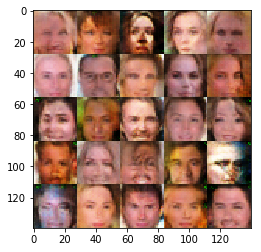

Epoch 3/3... Discriminator Loss: 1.4011... Generator Loss: 0.7761
Epoch 3/3... Discriminator Loss: 1.3283... Generator Loss: 0.9381
Epoch 3/3... Discriminator Loss: 1.3611... Generator Loss: 0.8245
Epoch 3/3... Discriminator Loss: 1.3812... Generator Loss: 0.7454
Epoch 3/3... Discriminator Loss: 1.3634... Generator Loss: 0.7851
Epoch 3/3... Discriminator Loss: 1.3608... Generator Loss: 0.8298
Epoch 3/3... Discriminator Loss: 1.4254... Generator Loss: 0.7471


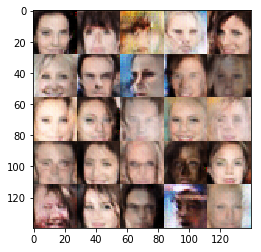

Epoch 3/3... Discriminator Loss: 1.3481... Generator Loss: 0.7254
Epoch 3/3... Discriminator Loss: 1.3785... Generator Loss: 0.7975
Epoch 3/3... Discriminator Loss: 1.3862... Generator Loss: 0.7885
Epoch 3/3... Discriminator Loss: 1.3572... Generator Loss: 0.7471
Epoch 3/3... Discriminator Loss: 1.3957... Generator Loss: 0.8401
Epoch 3/3... Discriminator Loss: 1.3913... Generator Loss: 0.7923


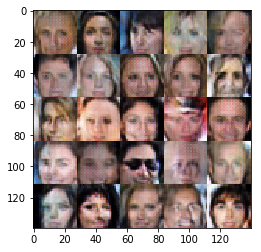

Epoch 3/3... Discriminator Loss: 1.4184... Generator Loss: 0.8028
Epoch 3/3... Discriminator Loss: 1.3076... Generator Loss: 0.8053
Epoch 3/3... Discriminator Loss: 1.4234... Generator Loss: 0.6858
Epoch 3/3... Discriminator Loss: 1.3890... Generator Loss: 0.6344
Epoch 3/3... Discriminator Loss: 1.3500... Generator Loss: 0.7754
Epoch 3/3... Discriminator Loss: 1.3155... Generator Loss: 0.7180


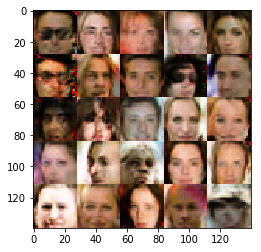

Epoch 3/3... Discriminator Loss: 1.3000... Generator Loss: 0.7967
Epoch 3/3... Discriminator Loss: 1.4037... Generator Loss: 0.8174
Epoch 3/3... Discriminator Loss: 1.3730... Generator Loss: 0.8562
Epoch 3/3... Discriminator Loss: 1.3821... Generator Loss: 0.7858
Epoch 3/3... Discriminator Loss: 1.3909... Generator Loss: 0.8189
Epoch 3/3... Discriminator Loss: 1.3271... Generator Loss: 0.7730


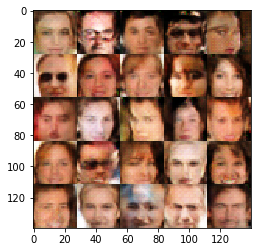

Epoch 3/3... Discriminator Loss: 1.3585... Generator Loss: 0.7957
Epoch 3/3... Discriminator Loss: 1.3545... Generator Loss: 0.7508
Epoch 3/3... Discriminator Loss: 1.3514... Generator Loss: 0.7418
Epoch 3/3... Discriminator Loss: 1.3510... Generator Loss: 0.7739
Epoch 3/3... Discriminator Loss: 1.2959... Generator Loss: 0.8088
Epoch 3/3... Discriminator Loss: 1.3760... Generator Loss: 0.7824
Epoch 3/3... Discriminator Loss: 1.3514... Generator Loss: 1.1120


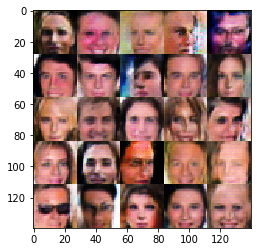

Epoch 3/3... Discriminator Loss: 1.3529... Generator Loss: 0.7796
Epoch 3/3... Discriminator Loss: 1.4858... Generator Loss: 0.6025
Epoch 3/3... Discriminator Loss: 1.5124... Generator Loss: 1.0879
Epoch 3/3... Discriminator Loss: 1.3451... Generator Loss: 0.8302
Epoch 3/3... Discriminator Loss: 1.4142... Generator Loss: 0.6885
Epoch 3/3... Discriminator Loss: 1.3354... Generator Loss: 0.8741


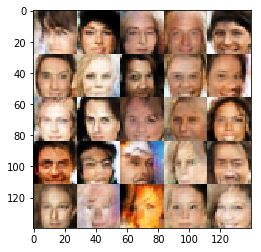

Epoch 3/3... Discriminator Loss: 1.3734... Generator Loss: 0.7648
Epoch 3/3... Discriminator Loss: 1.3332... Generator Loss: 0.8402
Epoch 3/3... Discriminator Loss: 1.3879... Generator Loss: 0.8445
Epoch 3/3... Discriminator Loss: 1.4715... Generator Loss: 0.8420
Epoch 3/3... Discriminator Loss: 1.3532... Generator Loss: 0.7579
Epoch 3/3... Discriminator Loss: 1.3440... Generator Loss: 0.7743


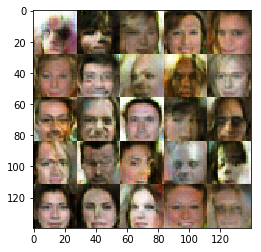

Epoch 3/3... Discriminator Loss: 1.3596... Generator Loss: 0.7830
Epoch 3/3... Discriminator Loss: 1.4454... Generator Loss: 1.0677
Epoch 3/3... Discriminator Loss: 1.3748... Generator Loss: 0.7957
Epoch 3/3... Discriminator Loss: 1.3804... Generator Loss: 0.7914
Epoch 3/3... Discriminator Loss: 1.3381... Generator Loss: 0.8241
Epoch 3/3... Discriminator Loss: 1.3551... Generator Loss: 0.9305


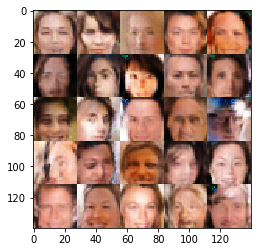

Epoch 3/3... Discriminator Loss: 1.3254... Generator Loss: 0.8209
Epoch 3/3... Discriminator Loss: 1.3958... Generator Loss: 0.7763
Epoch 3/3... Discriminator Loss: 1.3369... Generator Loss: 0.7345
Epoch 3/3... Discriminator Loss: 1.3539... Generator Loss: 0.7236
Epoch 3/3... Discriminator Loss: 1.3908... Generator Loss: 0.8063
Epoch 3/3... Discriminator Loss: 1.3649... Generator Loss: 0.8420
Epoch 3/3... Discriminator Loss: 1.3675... Generator Loss: 0.7791


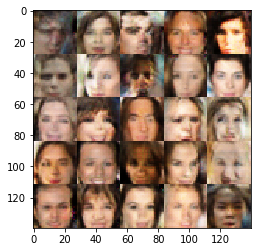

Epoch 3/3... Discriminator Loss: 1.3083... Generator Loss: 0.8417
Epoch 3/3... Discriminator Loss: 1.3754... Generator Loss: 0.7789
Epoch 3/3... Discriminator Loss: 1.3862... Generator Loss: 0.8422
Epoch 3/3... Discriminator Loss: 1.3280... Generator Loss: 0.8185
Epoch 3/3... Discriminator Loss: 1.4165... Generator Loss: 0.7903
Epoch 3/3... Discriminator Loss: 1.3816... Generator Loss: 0.8180


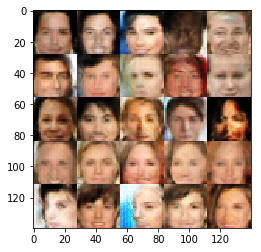

Epoch 3/3... Discriminator Loss: 1.3786... Generator Loss: 0.8181
Epoch 3/3... Discriminator Loss: 1.3769... Generator Loss: 0.7653
Epoch 3/3... Discriminator Loss: 1.3751... Generator Loss: 0.7068
Epoch 3/3... Discriminator Loss: 1.3406... Generator Loss: 0.7981
Epoch 3/3... Discriminator Loss: 1.4041... Generator Loss: 0.8164
Epoch 3/3... Discriminator Loss: 1.3716... Generator Loss: 0.7690


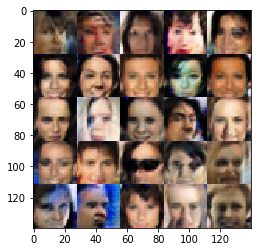

Epoch 3/3... Discriminator Loss: 1.3499... Generator Loss: 0.7880
Epoch 3/3... Discriminator Loss: 1.3224... Generator Loss: 0.8077
Epoch 3/3... Discriminator Loss: 1.3719... Generator Loss: 0.7511
Epoch 3/3... Discriminator Loss: 1.3332... Generator Loss: 0.7695
Epoch 3/3... Discriminator Loss: 1.3808... Generator Loss: 0.7755
Epoch 3/3... Discriminator Loss: 1.3534... Generator Loss: 0.7682


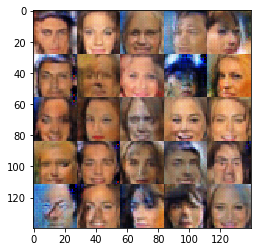

Epoch 3/3... Discriminator Loss: 1.3089... Generator Loss: 0.8311
Epoch 3/3... Discriminator Loss: 1.4234... Generator Loss: 0.7652
Epoch 3/3... Discriminator Loss: 1.4048... Generator Loss: 0.7897
Epoch 3/3... Discriminator Loss: 1.4312... Generator Loss: 0.7462
Epoch 3/3... Discriminator Loss: 1.3448... Generator Loss: 0.7226
Epoch 3/3... Discriminator Loss: 1.3885... Generator Loss: 0.8333
Epoch 3/3... Discriminator Loss: 1.3962... Generator Loss: 0.7209


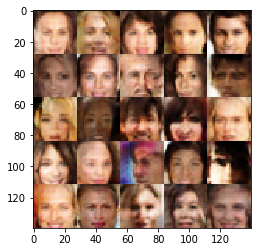

Epoch 3/3... Discriminator Loss: 1.3591... Generator Loss: 0.8506
Epoch 3/3... Discriminator Loss: 1.3371... Generator Loss: 0.8247
Epoch 3/3... Discriminator Loss: 1.3445... Generator Loss: 0.7843
Epoch 3/3... Discriminator Loss: 1.3195... Generator Loss: 0.8435
Epoch 3/3... Discriminator Loss: 1.3629... Generator Loss: 0.7980
Epoch 3/3... Discriminator Loss: 1.4110... Generator Loss: 0.7119


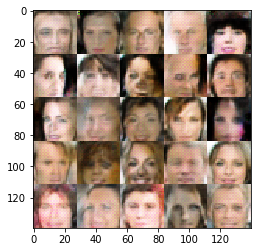

Epoch 3/3... Discriminator Loss: 1.3326... Generator Loss: 0.8133
Epoch 3/3... Discriminator Loss: 1.3273... Generator Loss: 0.7456
Epoch 3/3... Discriminator Loss: 1.3615... Generator Loss: 0.8488
Epoch 3/3... Discriminator Loss: 1.3372... Generator Loss: 0.8532
Epoch 3/3... Discriminator Loss: 1.3699... Generator Loss: 0.9393
Epoch 3/3... Discriminator Loss: 1.4438... Generator Loss: 0.7599


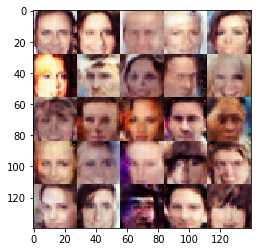

Epoch 3/3... Discriminator Loss: 1.4450... Generator Loss: 0.8681
Epoch 3/3... Discriminator Loss: 1.5147... Generator Loss: 0.7093
Epoch 3/3... Discriminator Loss: 1.3577... Generator Loss: 0.8495
Epoch 3/3... Discriminator Loss: 1.3536... Generator Loss: 0.8436
Epoch 3/3... Discriminator Loss: 1.3682... Generator Loss: 0.7970
Epoch 3/3... Discriminator Loss: 1.3833... Generator Loss: 0.7653


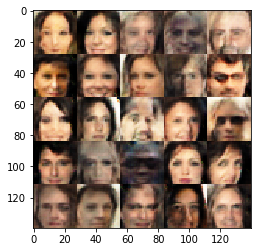

Epoch 3/3... Discriminator Loss: 1.4248... Generator Loss: 0.7415
Epoch 3/3... Discriminator Loss: 1.3834... Generator Loss: 0.8035
Epoch 3/3... Discriminator Loss: 1.4097... Generator Loss: 0.6233
Epoch 3/3... Discriminator Loss: 1.3892... Generator Loss: 0.7968
Epoch 3/3... Discriminator Loss: 1.4037... Generator Loss: 0.8479
Epoch 3/3... Discriminator Loss: 1.3950... Generator Loss: 0.7872
Epoch 3/3... Discriminator Loss: 1.4553... Generator Loss: 0.7875


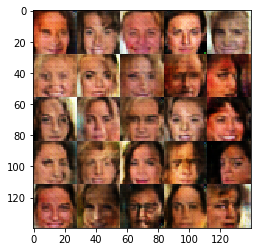

Epoch 3/3... Discriminator Loss: 1.3619... Generator Loss: 0.7774
Epoch 3/3... Discriminator Loss: 1.3893... Generator Loss: 0.8192
Epoch 3/3... Discriminator Loss: 1.3500... Generator Loss: 0.7866
Epoch 3/3... Discriminator Loss: 1.3539... Generator Loss: 0.7771
Epoch 3/3... Discriminator Loss: 1.4013... Generator Loss: 0.9702
Epoch 3/3... Discriminator Loss: 1.3533... Generator Loss: 0.8934


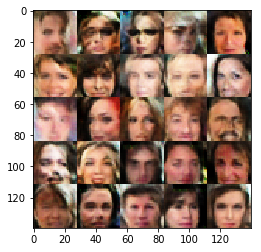

Epoch 3/3... Discriminator Loss: 1.3530... Generator Loss: 0.7989
Epoch 3/3... Discriminator Loss: 1.3497... Generator Loss: 0.8254
Epoch 3/3... Discriminator Loss: 1.3609... Generator Loss: 0.8162
Epoch 3/3... Discriminator Loss: 1.3561... Generator Loss: 0.8129
Epoch 3/3... Discriminator Loss: 1.3342... Generator Loss: 0.8053
Epoch 3/3... Discriminator Loss: 1.3374... Generator Loss: 0.8033


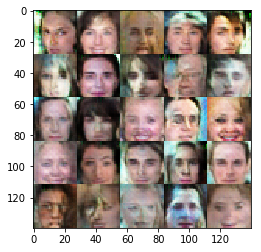

Epoch 3/3... Discriminator Loss: 1.3615... Generator Loss: 0.8351
Epoch 3/3... Discriminator Loss: 1.3511... Generator Loss: 0.8195
Epoch 3/3... Discriminator Loss: 1.3534... Generator Loss: 0.7791
Epoch 3/3... Discriminator Loss: 1.3583... Generator Loss: 0.8119
Epoch 3/3... Discriminator Loss: 1.4120... Generator Loss: 0.8127
Epoch 3/3... Discriminator Loss: 1.3299... Generator Loss: 0.8155


In [109]:
batch_size = 64
z_dim = 100
learning_rate = 0.004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 3

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, 
          celeba_dataset.get_batches,
          celeba_dataset.shape, 
          celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.